1.EXPLORATORY DATA ANALYSIS

a) **Specifying the Data Analytic Question **



1. Which personal factors influence a person's likelihood to have a bank account in east africa?
2. What is the distribution of bank accounts across people in East Africa?










c) **Understanding the context**




Africa is no stranger to economic challenges, this is particularly true for east africa.Banks still play a big role in the financial stability of the continent.Traditionally, access to bank account represent financial inclusion.This project seeks to give insight into the subject and make meaningful analysis that may influence future financial strategies leading to economic growth.




b) **Defining the Metric for Success**





success will have been achieved if we are able to identify trends and relationships that may be used to predict who is more likely to have a bank account in east africa.



d) **Recording the Experimental Design**

*   visual analysis of the data
*   descriptive analysis of the data
*   Describe behaviour of the data





e) Data Relevance

In [4]:
#import python libararies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
#import datasets
data = pd.read_csv('http://bit.ly/FinancialDataset')
data

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [6]:
#cleaning data
#check for null values
data.isnull().sum()
#ger rid of null values
data.dropna()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [ ]:
#check for duplicates
data.duplicated().sum()
#there are no duplicates

In [8]:
#drop column that will not be useful in the analysis
data.drop(['uniqueid'], axis=1, inplace= True)
data

,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [9]:
#rename columns
data.rename(columns = {	'Has a Bank account':'bank_account',	'Type of Location':'location',	'Cell Phone Access':'cellphone', 'Respondent Age':'age',	'gender_of_respondent':'gender',
                       'The relathip with head':'relate_head',	'Level of Educuation':'education',	'Type of Job':'job'}, inplace = True)
data

,country,year,bank_account,location,cellphone,household_size,age,gender,relate_head,marital_status,education,job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


UNIVARIATE ANALYSIS

In [14]:
#get information about the dataset
#get a descriptive summary of the data
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         23510 non-null  object 
 1   year            23524 non-null  int64  
 2   bank_account    23488 non-null  object 
 3   location        23509 non-null  object 
 4   cellphone       23513 non-null  object 
 5   household_size  23496 non-null  float64
 6   age             23490 non-null  float64
 7   gender          23490 non-null  object 
 8   relate_head     23520 non-null  object 
 9   marital_status  23492 non-null  object 
 10  education       23495 non-null  object 
 11  job             23494 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 2.2+ MB


,year,household_size,age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


In [27]:
#find out the mean age for people whose information was obtained
data['age'].mean()

38.804299702000854

In [25]:
#fund out the median value for age
data['age'].median()

35.0

In [34]:
#which gender is more?female
data['gender'].mode().sum()

'Female'

In [33]:
#rhe most observations for a bank account
data['bank_account'].mode().sum()

'No'

In [36]:
#most people were from the rural area
data['location'].mode().sum()

'Rural'

In [37]:
#2 is the common number of people in a household
data['household_size'].mode().sum()

0    2.0
dtype: float64

In [39]:
#find mode of cellphone
data['cellphone'].mode().sum()

'Yes'

In [41]:
#standard deviataion
data['age'].std()
#sd is high meaning data is more spread out away from the mean

16.51999610879876

In [42]:
#variance
data['age'].var()
#variance is high

272.9102714347262

In [47]:
#range is 21
highest = data['household_size'].max()
lowest = data['household_size'].min()
highest - lowest

21.0

In [49]:
#range for age is 84
highest1 = data['age'].max()
lowest1 = data['age'].min()
highest1 - lowest1

84.0

In [52]:
#quantiles
data['age'].quantile([0.25, 0.5, 0.75])

0.25    26.0
0.50    35.0
0.75    49.0
Name: age, dtype: float64

In [53]:
#skewness
data['age'].skew()
#the distribution is moderately skewed

0.8418012375387167

In [54]:
#kurtosis
data['age'].kurt()
#distribution is platykurtic

0.10110811880734305

In [56]:
#range
largest = data['age'].max()
smallest = data['age'].min()
range = largest - smallest
range

84.0

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


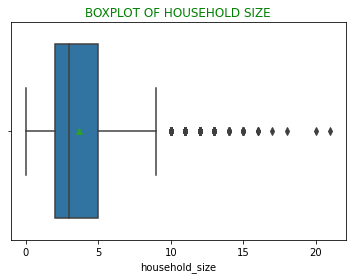

In [10]:
#cheking for outliers
#there are many outliers
sns.boxplot(data['household_size'], showmeans=True)
plt.title('BOXPLOT OF HOUSEHOLD SIZE' ,color='g')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


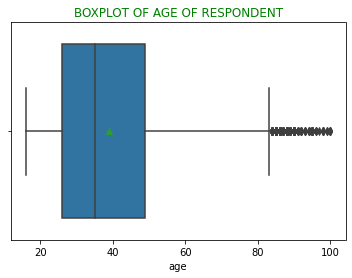

In [59]:
#chekcking for outliers
sns.boxplot(data['age'], showmeans=True)
plt.title('BOXPLOT OF AGE OF RESPONDENT' ,color='g')
plt.show()

In [70]:
#FREQUENCY DISTRIBUTION
data.age.value_counts()

30.0     1052
35.0      834
25.0      790
28.0      747
32.0      714
         ... 
100.0       5
93.0        4
96.0        3
99.0        2
97.0        1
Name: age, Length: 85, dtype: int64

<function matplotlib.pyplot.show>

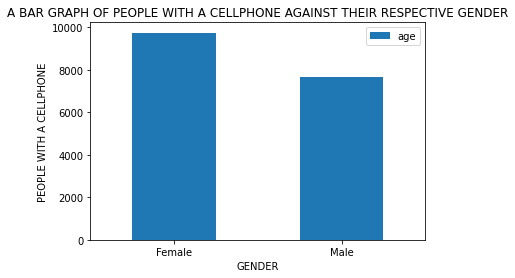

In [128]:
#BAR CHART
#there are more females than males with a cellphone
acc = data.loc[data['cellphone']=='Yes']
sex =acc.groupby(['gender']).count().reset_index()
sex.plot.bar(x='gender', y='age', rot=0)
plt.xlabel('GENDER')
plt.ylabel('PEOPLE WITH A CELLPHONE')
plt.title('A BAR GRAPH OF PEOPLE WITH A CELLPHONE AGAINST THEIR RESPECTIVE GENDER')
plt.show

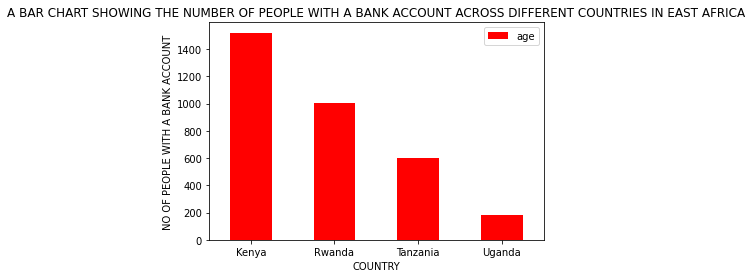

In [142]:
#BAR CHART
#kenya has the highest numbe rof people with a bank account
acc2 = data.loc[data['bank_account']=='Yes']
place =acc2.groupby(['country']).count().reset_index()
place
place.plot.bar(x='country', y='age', rot=0, color='red')
plt.xlabel('COUNTRY')
plt.ylabel('NO OF PEOPLE WITH A BANK ACCOUNT')
plt.title('A BAR CHART SHOWING THE NUMBER OF PEOPLE WITH A BANK ACCOUNT ACROSS DIFFERENT COUNTRIES IN EAST AFRICA')
plt.show()

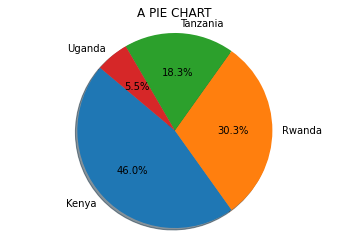

In [166]:
#PIE CHART
#uganda has the least people with a bank account
place = acc2.groupby(['country']).count().reset_index()
age =place['age']
countr=place['country'] 
plt.pie(age, labels=countr, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('A PIE CHART OF COUNTRIES WITH PEOPLE WHO HAVE A BANK ACCOUNT')
plt.show()

Text(0.5, 1.0, 'HISTOGRAM OF HOUSEHOLD SIZE')

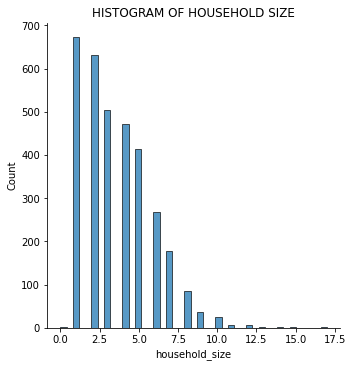

In [267]:
sns.displot(acc2['household_size'], kde=False)
plt.title('HISTOGRAM OF HOUSEHOLD SIZE')


BIVARIATE ANALYSIS

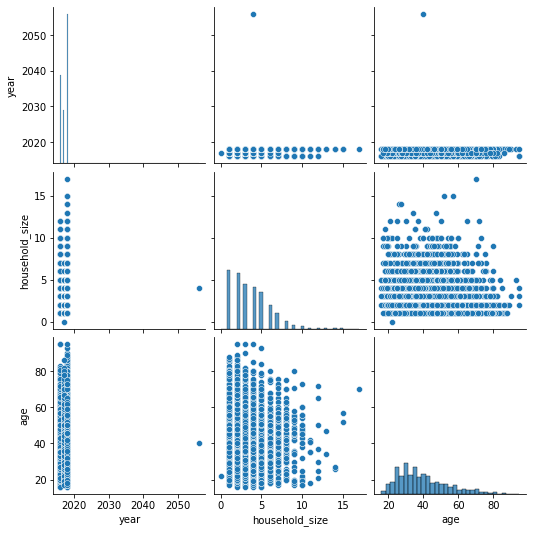

In [177]:
sns.pairplot(acc2)
plt.show()

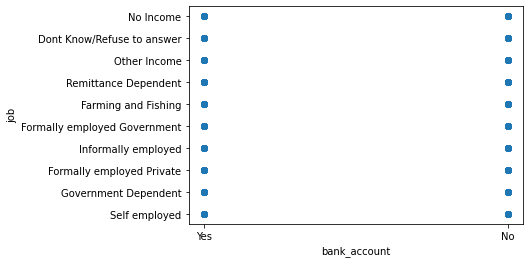

In [255]:
sns.regplot(x = data["bank_account"], y = data["job"], fit_reg=False)

<function matplotlib.pyplot.show>

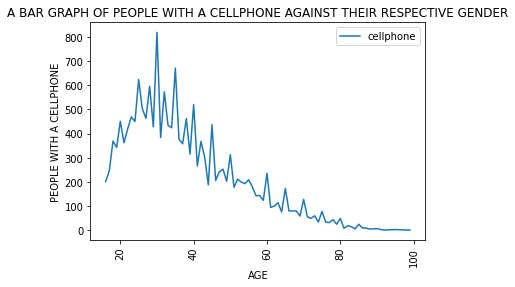

In [203]:
#acc = data.loc[data['cellphone']=='Yes']
work =acc.groupby(['age']).count().reset_index()
work.plot(x='age', y='cellphone', rot=90)
plt.xlabel('AGE')
plt.ylabel('PEOPLE WITH A CELLPHONE')
plt.title('A LINE GRAPH OF NO OF PEOPLE WITH A CELLPHONE FOR EVERY AGE')
plt.show

In [206]:
#positively skewed
data['age'].skew()

0.8418012375387167

<function matplotlib.pyplot.show>

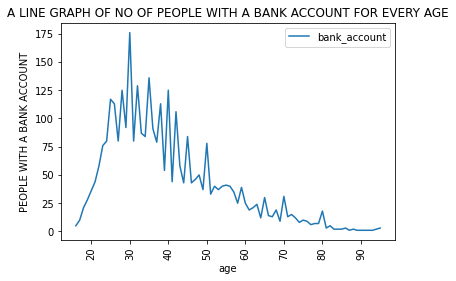

In [204]:
work =acc2.groupby(['age']).count().reset_index()
work.plot(x='age', y='bank_account', rot=90)
plt.xlabel('age')
plt.ylabel('PEOPLE WITH A BANK ACCOUNT')
plt.title('A LINE GRAPH OF NO OF PEOPLE WITH A BANK ACCOUNT FOR EVERY AGE')
plt.show

In [280]:
data["age"].corr(data["household_size"]) 

-0.1197092971464233

MULTIVARIATE ANALYSIS

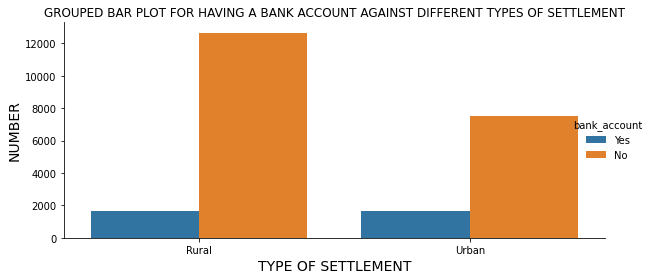

In [230]:
sns.catplot( x='location',
             kind="count", 
             hue="bank_account", 
             height=4, 
             aspect=2, 
             data=data)
plt.xlabel("TYPE OF SETTLEMENT", size=14)
plt.ylabel("NUMBER", size=14)
plt.title("GROUPED BAR PLOT FOR HAVING A BANK ACCOUNT AGAINST DIFFERENT TYPES OF SETTLEMENT")
plt.tight_layout()

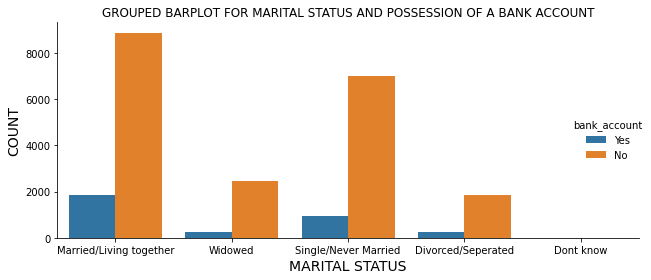

In [240]:
sns.catplot( x='marital_status',
             kind="count", 
             hue="bank_account", 
             height=4, 
             aspect=2, 
             data=data)
plt.xlabel("MARITAL STATUS", size=14)
plt.ylabel("COUNT", size=14)
plt.title("GROUPED BARPLOT FOR MARITAL STATUS AND POSSESSION OF A BANK ACCOUNT")
plt.tight_layout()

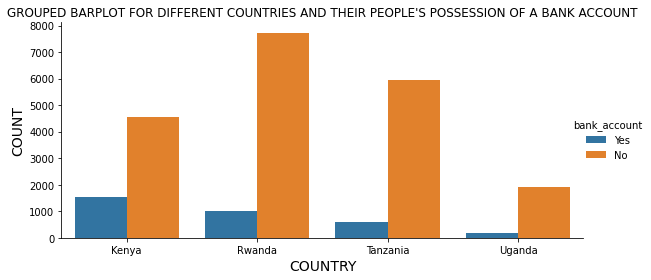

In [241]:
sns.catplot( x='country',
             kind="count", 
             hue="bank_account", 
             height=4, 
             aspect=2, 
             data=data)
plt.xlabel("COUNTRY", size=14)
plt.ylabel("COUNT", size=14)
plt.title("GROUPED BARPLOT FOR DIFFERENT COUNTRIES AND THEIR PEOPLE'S POSSESSION OF A BANK ACCOUNT")
plt.tight_layout()

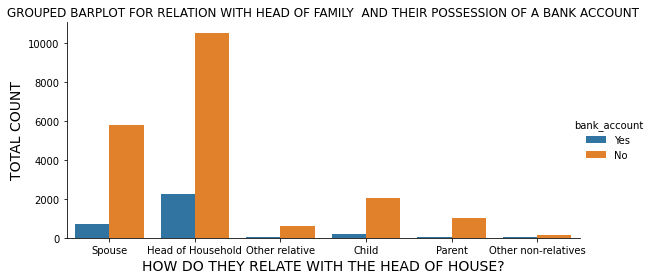

In [242]:
sns.catplot( x='relate_head',
             kind="count", 
             hue="bank_account", 
             height=4, 
             aspect=2, 
             data=data)
plt.xlabel("HOW DO THEY RELATE WITH THE HEAD OF HOUSE?", size=14)
plt.ylabel("TOTAL COUNT", size=14)
plt.title("GROUPED BARPLOT FOR RELATION WITH HEAD OF FAMILY  AND THEIR POSSESSION OF A BANK ACCOUNT")
plt.tight_layout()

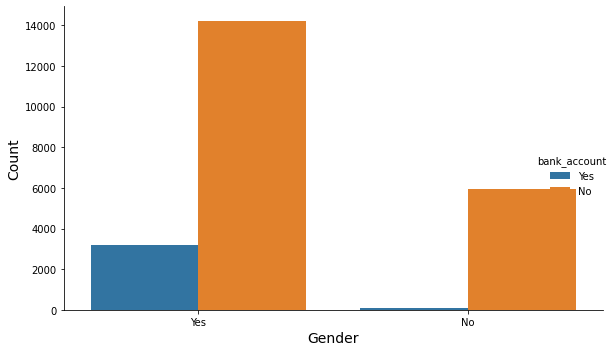

In [238]:
sns.catplot( x='cellphone',
             kind="count", 
             hue="bank_account", 
             height=4, 
             aspect=2, 
             data=data)
plt.xlabel("HAS A CELLPHONE", size=14)
plt.ylabel("NUMBER OF PEOPLE", size=14)
plt.title('GROUPED BARPLOT FOR PEOPLE WITH/WITHOUT CELLPHONE VS PEOPLE WITH/WITHOUT BANK ACCOUNT')
plt.tight_layout()